In [1]:
from keras.models import Sequential
from keras.layers import Dense
from numpy import array
from numpy.random import uniform
from numpy import hstack
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

C:\Users\10437\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\10437\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
def create_data(n):
 x1 = array([i/100+uniform(-1,3) for i in range(n)]).reshape(n,1)
 x2 = array([i/100+uniform(-3,5)+2 for i in range(n)]).reshape(n,1)
 x3 = array([i/100+uniform(-6,5)-3 for i in range(n)]).reshape(n,1)

 y1= [x1[i]-x2[i]+x3[i]+uniform(-2,2) for i in range(n)]
 y2= [x1[i]+x2[i]-x3[i]+5+uniform(-1,3) for i in range(n)]
 X = hstack((x1, x2, x3))
 Y = hstack((y1, y2))
 return X, Y

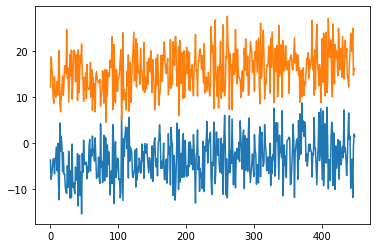

In [3]:
X, Y = create_data(n=450)

plt.plot(Y)
plt.show()

In [8]:
print("X:", X.shape, "Y:", Y.shape)
in_dim = X.shape[1]
out_dim = Y.shape[1]

X: (450, 3) Y: (450, 2)


2

In [5]:
xtrain, xtest, ytrain, ytest=train_test_split(X, Y, test_size=0.15)
print("xtrain:", xtrain.shape, "ytrian:", ytrain.shape)

xtrain: (382, 3) ytrian: (382, 2)


In [6]:
model = Sequential()
model.add(Dense(100, input_dim=in_dim, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(out_dim))
model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 3,698
Trainable params: 3,698
Non-trainable params: 0
_________________________________________________________________


y1 MSE:1.2421
y2 MSE:1.3438


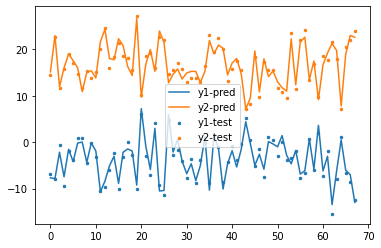

In [7]:
model.fit(xtrain, ytrain, epochs=100, batch_size=12, verbose=0)
 
ypred = model.predict(xtest)
print("y1 MSE:%.4f" % mean_squared_error(ytest[:,0], ypred[:,0]))
print("y2 MSE:%.4f" % mean_squared_error(ytest[:,1], ypred[:,1]))

x_ax = range(len(xtest))
plt.scatter(x_ax, ytest[:,0],  s=6, label="y1-test")
plt.plot(x_ax, ypred[:,0], label="y1-pred")
plt.scatter(x_ax, ytest[:,1],  s=6, label="y2-test")
plt.plot(x_ax, ypred[:,1], label="y2-pred")
plt.legend()
plt.show()